In [1]:
from VAE import *

2025-11-21 14:06:54.076977: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-21 14:06:54.077037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-21 14:06:54.080669: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-21 14:06:54.106501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 5C0J
- %10 Train

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1548 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 100 train and 901 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.


2025-11-21 14:08:01.406632: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 14:08:01.826949: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 14:08:01.827039: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 14:08:01.830113: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-21 14:08:01.830197: I external/local_xla/xla/stream_executor

Epoch 1/300


2025-11-21 14:08:08.629280: I external/local_xla/xla/service/service.cc:168] XLA service 0x7d905444efa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-21 14:08:08.629360: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-11-21 14:08:08.637736: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-21 14:08:08.662144: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1763723288.750169  150136 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 7s 230ms/step - loss: 1.0294 - mean_squared_error: 0.0471 - val_loss: 1.0168 - val_mean_squared_error: 0.1171
Epoch 2/300
4/4 [==============================] - 0s 98ms/step - loss: 0.9870 - mean_squared_error: 0.0470 - val_loss: 0.9755 - val_mean_squared_error: 0.1169
Epoch 3/300
4/4 [==============================] - 0s 84ms/step - loss: 0.9433 - mean_squared_error: 0.0469 - val_loss: 0.9354 - val_mean_squared_error: 0.1166
Epoch 4/300
4/4 [==============================] - 0s 76ms/step - loss: 0.9027 - mean_squared_error: 0.0467 - val_loss: 0.8961 - val_mean_squared_error: 0.1162
Epoch 5/300
4/4 [==============================] - 0s 72ms/step - loss: 0.8650 - mean_squared_error: 0.0465 - val_loss: 0.8577 - val_mean_squared_error: 0.1159
Epoch 6/300
4/4 [==============================] - 0s 73ms/step - loss: 0.8243 - mean_squared_error: 0.0463 - val_loss: 0.8200 - val_mean_squared_error: 0.1156
Epoch 7/300
4/4 [==============================] - 

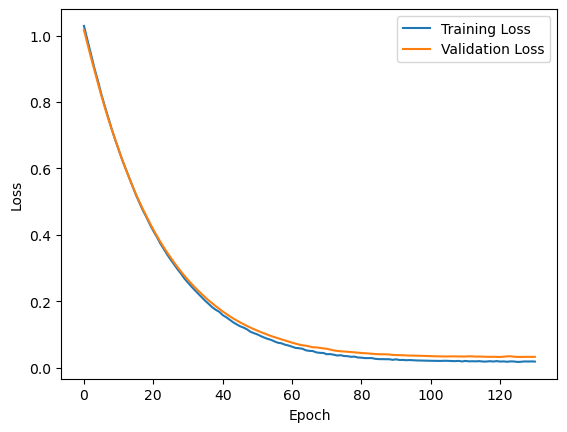

29/29 [==============================] - 0s 3ms/step


In [2]:
x_train_5C0J, x_test_5C0J , x_train_orig_5C0J ,x_test_orig_5C0J ,scaler_5C0J = preprocess_pipeline(
    dcd_file="proteins/5C0J/5C0J_replica_0.dcd",
    pdb_file="proteins/5C0J/5C0J.pdb",
    protein_name="5C0J",
    train_ratio=0.1
)

history_5C0J, sampling_model_5C0J = model_training(32, 300, x_train_5C0J, x_test_5C0J )
reshaped_train_5C0J, reconstruct_train_5C0J, reshaped_test_5C0J, reconstruct_test_5C0J =  reconstruct(x_train_5C0J,x_test_5C0J,sampling_model_5C0J,scaler_5C0J)



> DCD file saved: generated_files/5C0J_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


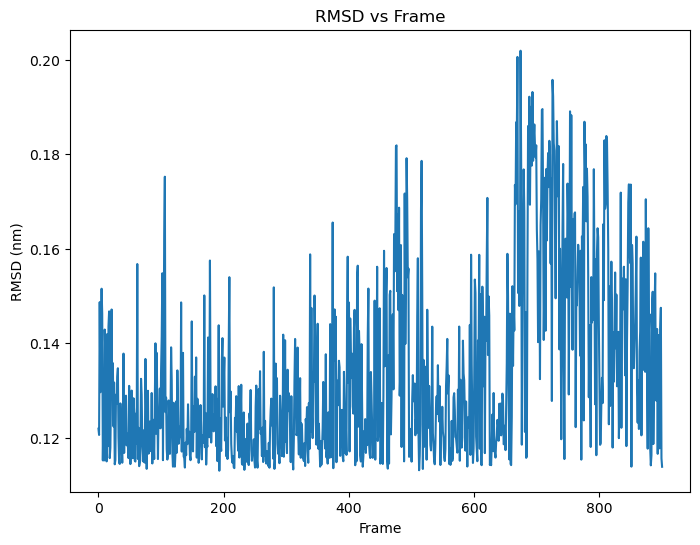

> RMSD values saved: generated_files/5C0J_generated_rmsd.txt


In [3]:
output_path_5C0J = save_selected_atoms("proteins/5C0J/5C0J.pdb")
dcd_path_5C0J = create_dcd_from_decoded(
    pdb_file="selected_pdb/5C0J_selected.pdb",
    decoded_coords=reshaped_test_5C0J,  # (n_frames, n_atoms, 3)
    output_prefix="5C0J",
    output_dir="generated_files"
)


rmsd_values_5C0J = compute_rmsd(
    reference_pdb=output_path_5C0J,
    dcd_file=dcd_path_5C0J,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/5C0J_generated_rmsd.txt"
)

- %20 Train

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1548 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 200 train and 801 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.
Epoch 1/300
7/7 [==============================] - 4s 109ms/step - loss: 1.0146 - mean_squared_error: 0.0399 - val_loss: 0.9877 - val_mean_squared_error: 0.1024
Epoch 2/300
7/7 [==============================] - 0s 57ms/step - loss: 0.9395 - mean_squared_error: 0.0396 - val_loss: 0.9146 - val_mean_squared_error: 0.1021
Epoch 3/300
7/7 [==============================] - 0s 45ms/step - loss: 0.8686 - mean_squared_error: 0.0393 - val_loss: 0.8463 - val_mean_squared_error: 0.1017
Epoch 4/300
7/7 [==============================] - 0s 44ms/step - loss: 0.8023 - mean_squared_error: 0.0388 - val_loss: 0.7824 - val

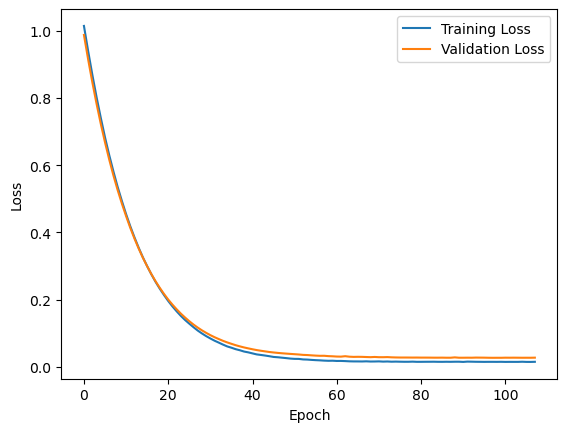

26/26 [==============================] - 0s 3ms/step


In [4]:
x_train_5C0J, x_test_5C0J , x_train_orig_5C0J ,x_test_orig_5C0J ,scaler_5C0J = preprocess_pipeline(
    dcd_file="proteins/5C0J/5C0J_replica_0.dcd",
    pdb_file="proteins/5C0J/5C0J.pdb",
    protein_name="5C0J_0.2",
    train_ratio=0.2
)

history_5C0J, sampling_model_5C0J = model_training(32, 300, x_train_5C0J, x_test_5C0J )
reshaped_train_5C0J, reconstruct_train_5C0J, reshaped_test_5C0J, reconstruct_test_5C0J =  reconstruct(x_train_5C0J,x_test_5C0J,sampling_model_5C0J,scaler_5C0J)



> DCD file saved: generated_files/5C0J_0.2_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


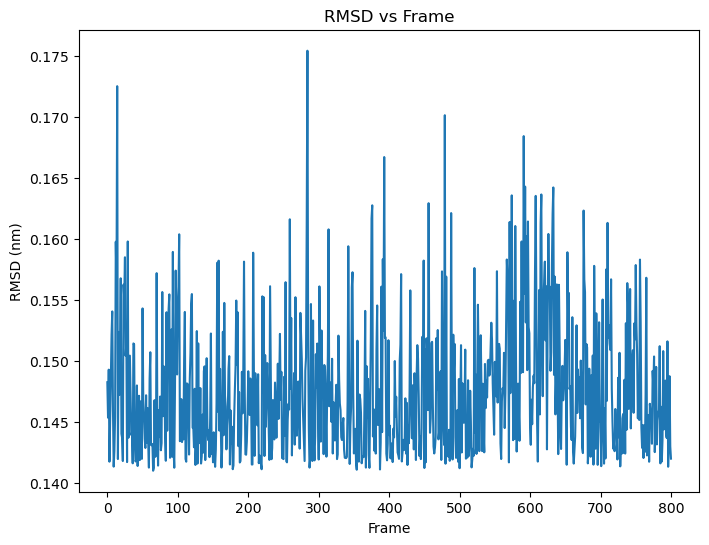

> RMSD values saved: generated_files/5C0J_generated_rmsd_0.2.txt


In [5]:
output_path_5C0J = save_selected_atoms("proteins/5C0J/5C0J.pdb")
dcd_path_5C0J = create_dcd_from_decoded(
    pdb_file="selected_pdb/5C0J_selected.pdb",
    decoded_coords=reshaped_test_5C0J,  
    output_prefix="5C0J_0.2",
    output_dir="generated_files"
)


rmsd_values_5C0J = compute_rmsd(
    reference_pdb=output_path_5C0J,
    dcd_file=dcd_path_5C0J,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/5C0J_generated_rmsd_0.2.txt"
)

- %30 Train

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1548 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 300 train and 701 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.
Epoch 1/300
10/10 [==============================] - 4s 74ms/step - loss: 0.9946 - mean_squared_error: 0.0357 - val_loss: 0.9513 - val_mean_squared_error: 0.0931
Epoch 2/300
10/10 [==============================] - 0s 26ms/step - loss: 0.8900 - mean_squared_error: 0.0353 - val_loss: 0.8529 - val_mean_squared_error: 0.0922
Epoch 3/300
10/10 [==============================] - 0s 32ms/step - loss: 0.7943 - mean_squared_error: 0.0345 - val_loss: 0.7639 - val_mean_squared_error: 0.0922
Epoch 4/300
10/10 [==============================] - 0s 31ms/step - loss: 0.7081 - mean_squared_error: 0.0335 - val_loss: 0.684

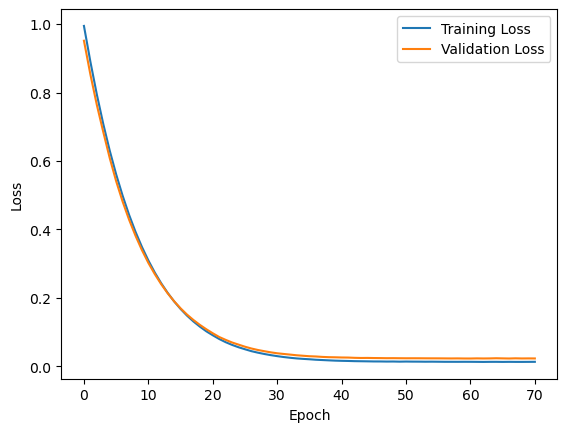

22/22 [==============================] - 0s 3ms/step


In [6]:
x_train_5C0J, x_test_5C0J , x_train_orig_5C0J ,x_test_orig_5C0J ,scaler_5C0J = preprocess_pipeline(
    dcd_file="proteins/5C0J/5C0J_replica_0.dcd",
    pdb_file="proteins/5C0J/5C0J.pdb",
    protein_name="5C0J_0.3",
    train_ratio=0.3
)

history_5C0J, sampling_model_5C0J = model_training(32, 300, x_train_5C0J, x_test_5C0J )
reshaped_train_5C0J, reconstruct_train_5C0J, reshaped_test_5C0J, reconstruct_test_5C0J =  reconstruct(x_train_5C0J,x_test_5C0J,sampling_model_5C0J,scaler_5C0J)



> DCD file saved: generated_files/5C0J_0.3_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


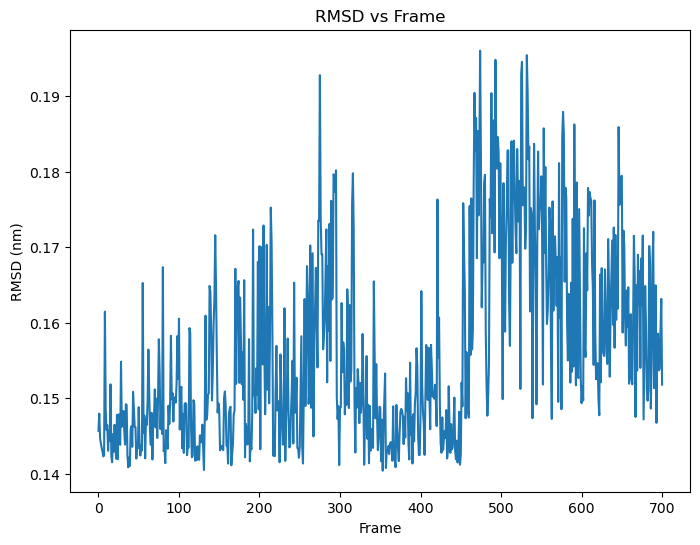

> RMSD values saved: generated_files/5C0J_generated_rmsd_0.3.txt


In [7]:
output_path_5C0J = save_selected_atoms("proteins/5C0J/5C0J.pdb")
dcd_path_5C0J = create_dcd_from_decoded(
    pdb_file="selected_pdb/5C0J_selected.pdb",
    decoded_coords=reshaped_test_5C0J,  # (n_frames, n_atoms, 3)
    output_prefix="5C0J_0.3",
    output_dir="generated_files"
)


rmsd_values_5C0J = compute_rmsd(
    reference_pdb=output_path_5C0J,
    dcd_file=dcd_path_5C0J,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/5C0J_generated_rmsd_0.3.txt"
)

- %40 Train

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1548 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 400 train and 601 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.
Epoch 1/300
13/13 [==============================] - 4s 53ms/step - loss: 0.9762 - mean_squared_error: 0.0332 - val_loss: 0.9321 - val_mean_squared_error: 0.0922
Epoch 2/300
13/13 [==============================] - 0s 20ms/step - loss: 0.8440 - mean_squared_error: 0.0325 - val_loss: 0.8023 - val_mean_squared_error: 0.0910
Epoch 3/300
13/13 [==============================] - 0s 23ms/step - loss: 0.7271 - mean_squared_error: 0.0310 - val_loss: 0.6934 - val_mean_squared_error: 0.0946
Epoch 4/300
13/13 [==============================] - 0s 22ms/step - loss: 0.6252 - mean_squared_error: 0.0303 - val_loss: 0.596

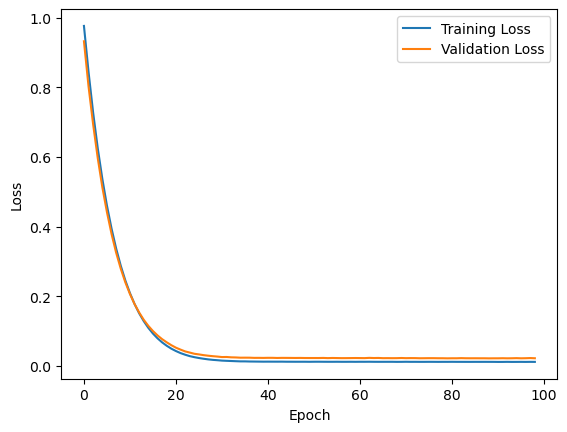

19/19 [==============================] - 0s 3ms/step


In [8]:
x_train_5C0J, x_test_5C0J , x_train_orig_5C0J ,x_test_orig_5C0J ,scaler_5C0J = preprocess_pipeline(
    dcd_file="proteins/5C0J/5C0J_replica_0.dcd",
    pdb_file="proteins/5C0J/5C0J.pdb",
    protein_name="5C0J_0.4",
    train_ratio=0.4
)

history_5C0J, sampling_model_5C0J = model_training(32, 300, x_train_5C0J, x_test_5C0J )
reshaped_train_5C0J, reconstruct_train_5C0J, reshaped_test_5C0J, reconstruct_test_5C0J =  reconstruct(x_train_5C0J,x_test_5C0J,sampling_model_5C0J,scaler_5C0J)



> DCD file saved: generated_files/5C0J_0.4_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


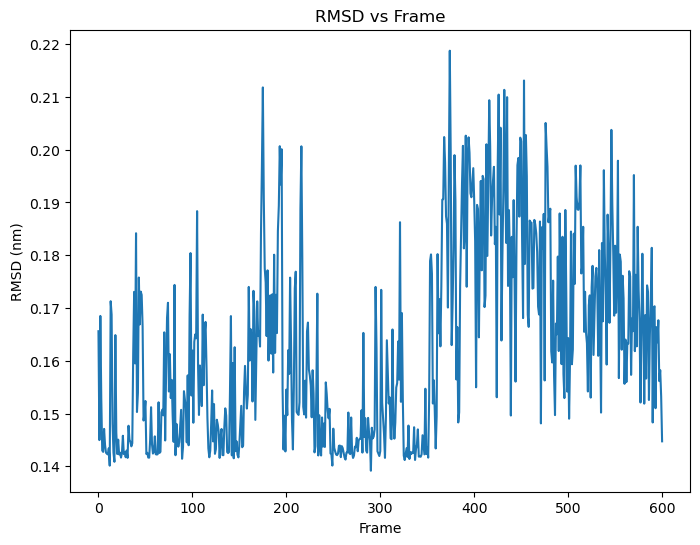

> RMSD values saved: generated_files/5C0J_generated_rmsd_0.4.txt


In [9]:
output_path_5C0J = save_selected_atoms("proteins/5C0J/5C0J.pdb")
dcd_path_5C0J = create_dcd_from_decoded(
    pdb_file="selected_pdb/5C0J_selected.pdb",
    decoded_coords=reshaped_test_5C0J,  # (n_frames, n_atoms, 3)
    output_prefix="5C0J_0.4",
    output_dir="generated_files"
)


rmsd_values_5C0J = compute_rmsd(
    reference_pdb=output_path_5C0J,
    dcd_file=dcd_path_5C0J,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/5C0J_generated_rmsd_0.4.txt"
)

- %50 Train

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
> Loaded 1001 frames, 1548 selected atoms.
> All frames aligned to reference (frame 0).
> Split into 500 train and 501 test frames.
> Data saved under 'processed_data/'
> Data loaded from 'processed_data/'
> Data normalized to [0, 1].
> Preprocessing complete.
Epoch 1/300
16/16 [==============================] - 4s 46ms/step - loss: 0.9554 - mean_squared_error: 0.0318 - val_loss: 0.8889 - val_mean_squared_error: 0.0915
Epoch 2/300
16/16 [==============================] - 0s 20ms/step - loss: 0.7976 - mean_squared_error: 0.0305 - val_loss: 0.7402 - val_mean_squared_error: 0.0906
Epoch 3/300
16/16 [==============================] - 0s 20ms/step - loss: 0.6629 - mean_squared_error: 0.0291 - val_loss: 0.6167 - val_mean_squared_error: 0.0903
Epoch 4/300
16/16 [==============================] - 0s 18ms/step - loss: 0.5498 - mean_squared_error: 0.0287 - val_loss: 0.513

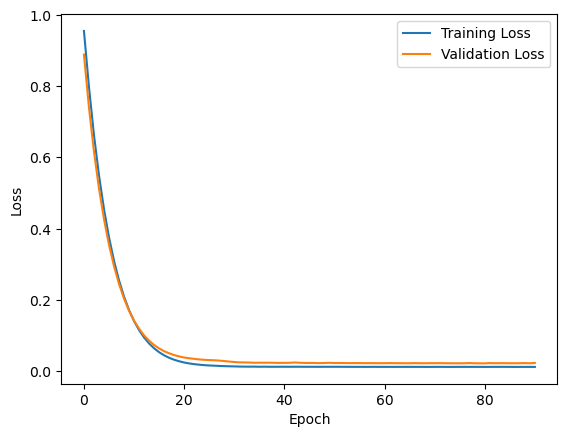

16/16 [==============================] - 0s 3ms/step


In [10]:
x_train_5C0J, x_test_5C0J , x_train_orig_5C0J ,x_test_orig_5C0J ,scaler_5C0J = preprocess_pipeline(
    dcd_file="proteins/5C0J/5C0J_replica_0.dcd",
    pdb_file="proteins/5C0J/5C0J.pdb",
    protein_name="5C0J_0.5",
    train_ratio=0.5
)

history_5C0J, sampling_model_5C0J = model_training(32, 300, x_train_5C0J, x_test_5C0J )
reshaped_train_5C0J, reconstruct_train_5C0J, reshaped_test_5C0J, reconstruct_test_5C0J =  reconstruct(x_train_5C0J,x_test_5C0J,sampling_model_5C0J,scaler_5C0J)



> DCD file saved: generated_files/5C0J_0.5_generated.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


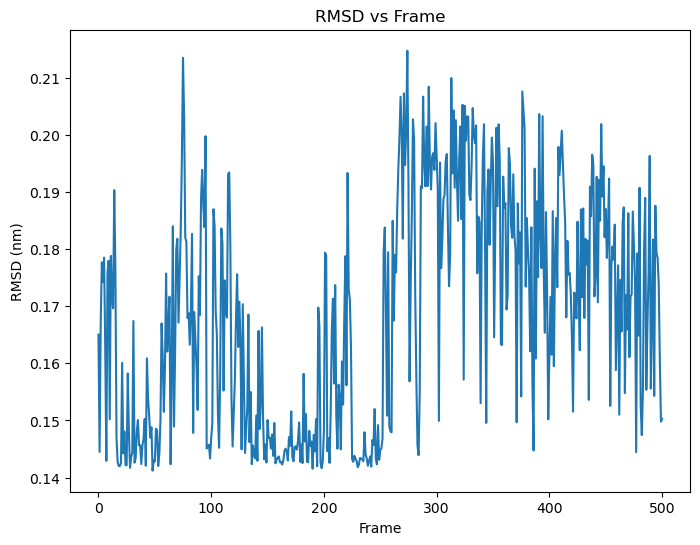

> RMSD values saved: generated_files/5C0J_generated_rmsd_0.5.txt


In [11]:
output_path_5C0J = save_selected_atoms("proteins/5C0J/5C0J.pdb")
dcd_path_5C0J = create_dcd_from_decoded(
    pdb_file="selected_pdb/5C0J_selected.pdb",
    decoded_coords=reshaped_test_5C0J,  # (n_frames, n_atoms, 3)
    output_prefix="5C0J_0.5",
    output_dir="generated_files"
)


rmsd_values_5C0J = compute_rmsd(
    reference_pdb=output_path_5C0J,
    dcd_file=dcd_path_5C0J,
    atom_selection="name N or name CA or name C or name O",
    output_txt="generated_files/5C0J_generated_rmsd_0.5.txt"
)

# RMSD

In [12]:
def compute_rmsd_per_frame(pdb_file,
                           dcd_file,
                           atom_selection="name N or name CA or name C or name O", 
                           align=True,
                           ref_frame=0,
                           plot=True):
 

   
    traj = md.load_dcd(dcd_file, top=pdb_file)  

    atom_indices = traj.topology.select(atom_selection)

    ref = traj[ref_frame]

    if align:
        traj_super = traj.superpose(ref, atom_indices=atom_indices)  
    else:
        traj_super = traj  

    rmsd_vals_nm = md.rmsd(traj_super, ref, atom_indices=atom_indices)

    if plot:
        plt.figure(figsize=(8,3.5))
        plt.plot(rmsd_vals_nm , lw=1.5)
        plt.xlabel("Frame")
        plt.ylabel("RMSD(nm)")
        plt.title("RMSD 5C0J MD Simulation")


dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


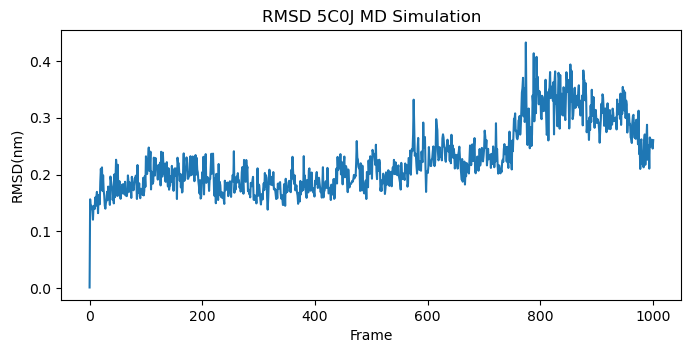

In [13]:
dcd_file="proteins/5C0J/5C0J_replica_0.dcd"
pdb_file="proteins/5C0J/5C0J.pdb"

compute_rmsd_per_frame(pdb_file,
                           dcd_file,
                           atom_selection="name N or name CA or name C or name O", 
                           align=True,
                           ref_frame=0,
                           plot=True)

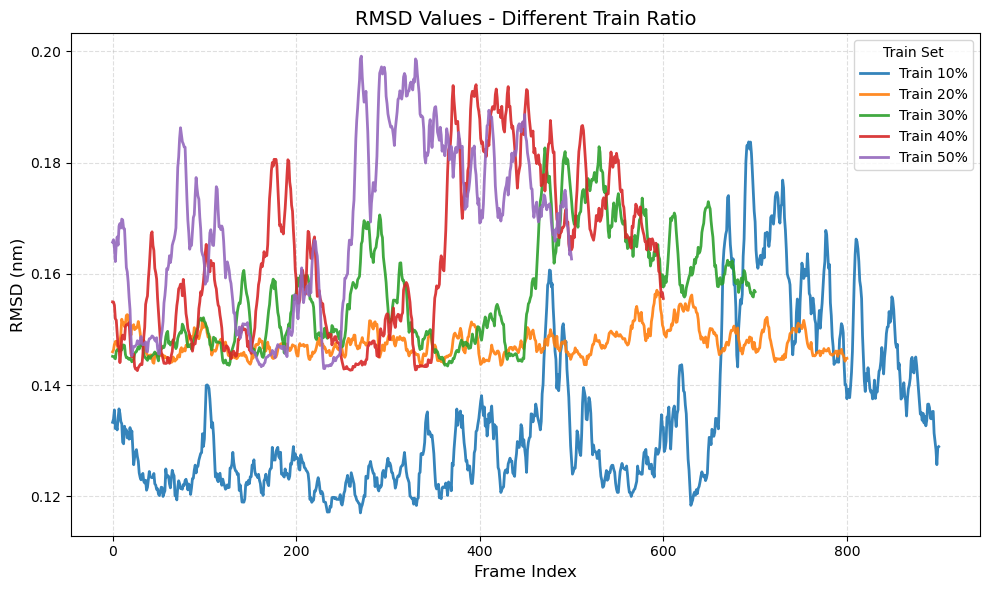

In [14]:
from scipy.ndimage import uniform_filter1d
data_dir = "generated_files"

files = {
    "10%": os.path.join(data_dir, "5C0J_generated_rmsd.txt"),
    "20%": os.path.join(data_dir, "5C0J_generated_rmsd_0.2.txt"),
    "30%": os.path.join(data_dir, "5C0J_generated_rmsd_0.3.txt"),
    "40%": os.path.join(data_dir, "5C0J_generated_rmsd_0.4.txt"),
    "50%": os.path.join(data_dir, "5C0J_generated_rmsd_0.5.txt"),
}

plt.figure(figsize=(10, 6))
window = 10 

for label, file_path in files.items():
    if os.path.exists(file_path):
        rmsd_values = np.loadtxt(file_path)
      
        smooth_rmsd = uniform_filter1d(rmsd_values, size=window)
        plt.plot(smooth_rmsd, lw=2, label=f"Train {label}", alpha=0.9)


plt.title("RMSD Values - Different Train Ratio", fontsize=14)
plt.xlabel("Frame Index", fontsize=12)
plt.ylabel("RMSD (nm)", fontsize=12)
plt.legend(title="Train Set", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


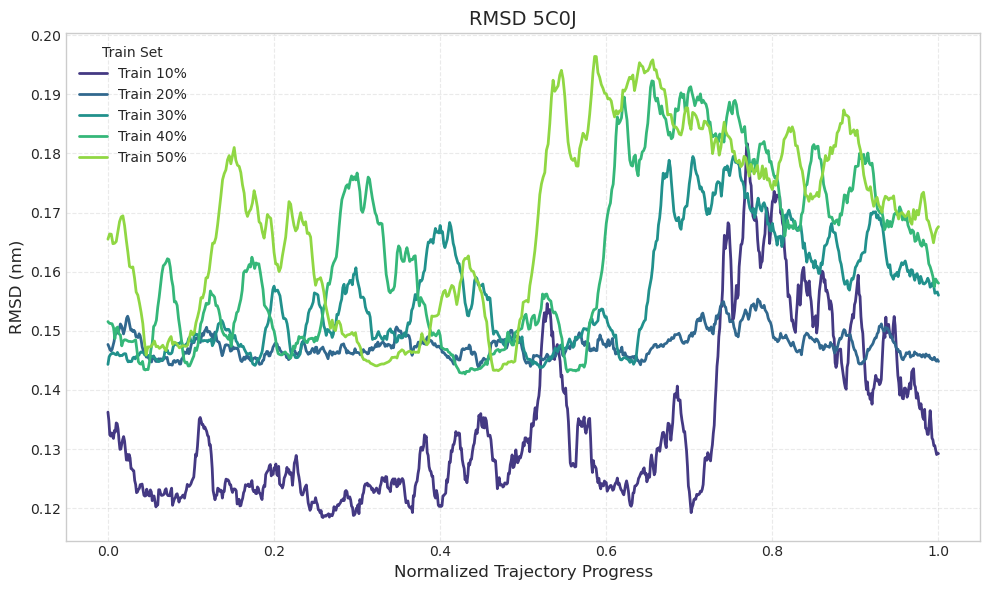

In [16]:
from scipy.ndimage import uniform_filter1d
import seaborn as sns

data_dir = "generated_files"

files = {
    "10%": os.path.join(data_dir, "5C0J_generated_rmsd.txt"),
    "20%": os.path.join(data_dir, "5C0J_generated_rmsd_0.2.txt"),
    "30%": os.path.join(data_dir, "5C0J_generated_rmsd_0.3.txt"),
    "40%": os.path.join(data_dir, "5C0J_generated_rmsd_0.4.txt"),
    "50%": os.path.join(data_dir, "5C0J_generated_rmsd_0.5.txt"),
}


plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", n_colors=len(files))
window = 15 
for i, (label, file_path) in enumerate(files.items()):
    if os.path.exists(file_path):
        rmsd = np.loadtxt(file_path)
     
        smooth = uniform_filter1d(rmsd, size=window)

        x = np.linspace(0, 1, len(smooth))

        plt.plot(x, smooth, lw=2, color=colors[i], label=f"Train {label}")


plt.title("RMSD 5C0J", fontsize=14)
plt.xlabel("Normalized Trajectory Progress", fontsize=12)
plt.ylabel("RMSD (nm)", fontsize=12)
plt.legend(title="Train Set", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


# BOX Plot

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
Total Frames: 1001
10% 100 frame -> subset_dcds/10percent_5C0J_replica_0.dcd
20% 200 frame -> subset_dcds/20percent_5C0J_replica_0.dcd
30% 300 frame -> subset_dcds/30percent_5C0J_replica_0.dcd
40% 400 frame -> subset_dcds/40percent_5C0J_replica_0.dcd
50% 500 frame -> subset_dcds/50percent_5C0J_replica_0.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endian

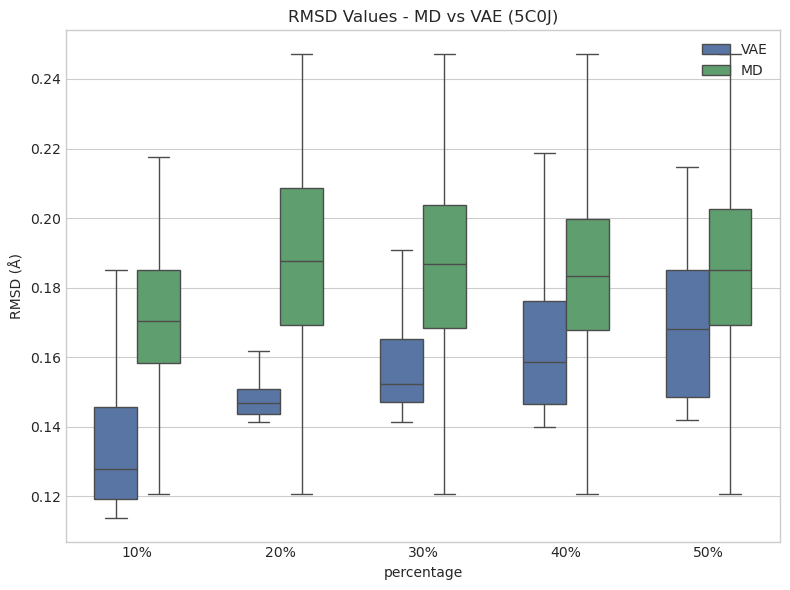

In [17]:
import pandas as pd
def split_dcd_by_percentage(dcd_file, pdb_file, output_dir="subset_dcds", percentages=[10, 20, 30, 40, 50]):

    os.makedirs(output_dir, exist_ok=True)

    traj = md.load_dcd(dcd_file, top=pdb_file)
    total_frames = traj.n_frames
    print(f"Total Frames: {total_frames}")

    for p in percentages:
        subset_frames = int(total_frames * (p / 100.0))
        subset_traj = traj[:subset_frames] 
        output_path = os.path.join(output_dir, f"{p}percent_{os.path.basename(dcd_file)}")
        subset_traj.save_dcd(output_path)
        print(f"{p}% {subset_frames} frame -> {output_path}")



dcd_file="proteins/5C0J/5C0J_replica_0.dcd"
pdb_file="proteins/5C0J/5C0J.pdb"

split_dcd_by_percentage(dcd_file, pdb_file)


def rmsd_distribution_for_files(pdb_file, dcd_files, atom_selection="name CA"):
    ref = md.load_pdb(pdb_file)
    atom_indices = ref.topology.select(atom_selection)
    ref = ref.atom_slice(atom_indices)

    rmsd_dict = {}
    for f in dcd_files:
        traj = md.load_dcd(f, top=pdb_file)
        traj = traj.atom_slice(atom_indices)
        rmsd = md.rmsd(traj, ref)
        rmsd_dict[os.path.basename(f)] = rmsd
    return rmsd_dict


pdb_file = "selected_pdb/5C0J_selected.pdb"

vae_files = {
    "10%": "generated_files/5C0J_generated.dcd",
    "20%": "generated_files/5C0J_0.2_generated.dcd",
    "30%": "generated_files/5C0J_0.3_generated.dcd",
    "40%": "generated_files/5C0J_0.4_generated.dcd",
    "50%": "generated_files/5C0J_0.5_generated.dcd",
}
pdb = "proteins/5C0J/5C0J.pdb"
md_files = {
    "10%": "subset_dcds/10percent_5C0J_replica_0.dcd",
    "20%": "subset_dcds/20percent_5C0J_replica_0.dcd",
    "30%": "subset_dcds/30percent_5C0J_replica_0.dcd",
    "40%": "subset_dcds/40percent_5C0J_replica_0.dcd",
    "50%": "subset_dcds/50percent_5C0J_replica_0.dcd",
}


vae_rmsd = rmsd_distribution_for_files(pdb_file, list(vae_files.values()), atom_selection="name CA")
md_rmsd  = rmsd_distribution_for_files(pdb, list(md_files.values()),  atom_selection="name CA")

df_list = []

for label, path in vae_files.items():
    fname = os.path.basename(path)
    rmsd = vae_rmsd[fname]
    df_list.append(pd.DataFrame({"percentage": label, "rmsd": rmsd, "source": "VAE"}))

for label, path in md_files.items():
    fname = os.path.basename(path)
    rmsd = md_rmsd[fname]
    df_list.append(pd.DataFrame({"percentage": label, "rmsd": rmsd, "source": "MD"}))

df = pd.concat(df_list, ignore_index=True)


plt.figure(figsize=(8,6))
sns.boxplot(x="percentage", y="rmsd", hue="source", data=df,showfliers=False,
            palette=["#4C72B0", "#55A868"], width=0.6)


plt.ylabel("RMSD (Å)")
plt.title("RMSD Values - MD vs VAE (5C0J)")
plt.legend(title="", loc="upper right")
plt.tight_layout()
plt.show()


# RMSF

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


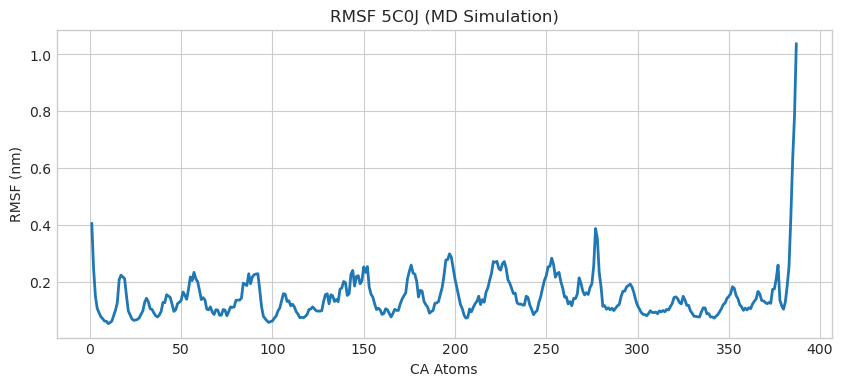

In [18]:

traj = md.load_dcd("proteins/5C0J/5C0J_replica_0.dcd", top="proteins/5C0J/5C0J.pdb")
atoms = traj.topology.select('name CA')  
traj_atom = traj.atom_slice(atoms)

ref = md.load_pdb("proteins/5C0J/5C0J.pdb").atom_slice(atoms)
traj_atom.superpose(ref)

positions = traj_atom.xyz  # shape (frames, atoms, 3)
avg_positions = positions.mean(axis=0)
rmsf = np.sqrt(((positions - avg_positions)**2).sum(axis=2).mean(axis=0))

plt.figure(figsize=(10,4))
plt.plot(range(1, len(rmsf)+1), rmsf, lw=2)
plt.xlabel('CA Atoms')
plt.ylabel('RMSF (nm)')
plt.title('RMSF 5C0J (MD Simulation)')
plt.grid(True)
plt.show()

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


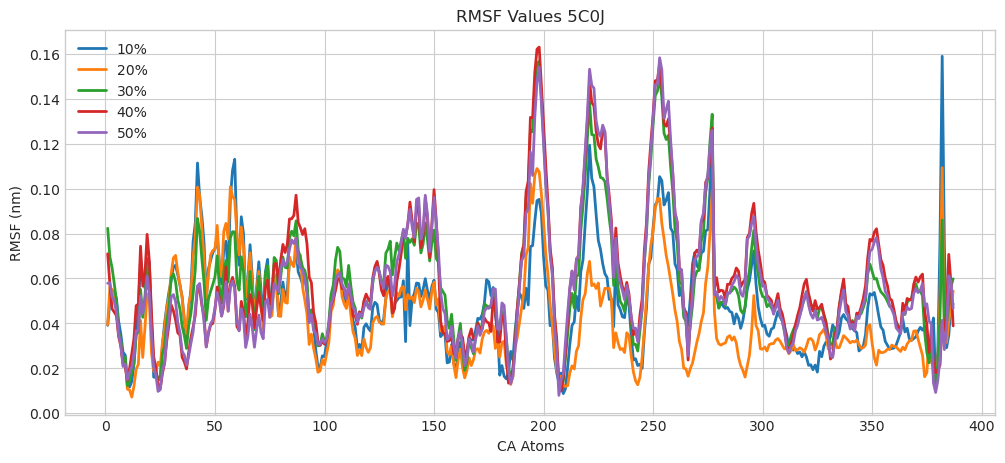

In [19]:
data_dir = "generated_files"


models = {
    "10%": ("5C0J_selected.pdb", "5C0J_generated.dcd"),
    "20%": ("5C0J_selected.pdb", "5C0J_0.2_generated.dcd"),
    "30%": ("5C0J_selected.pdb", "5C0J_0.3_generated.dcd"),
    "40%": ("5C0J_selected.pdb", "5C0J_0.4_generated.dcd"),
    "50%": ("5C0J_selected.pdb", "5C0J_0.5_generated.dcd")
}

plt.figure(figsize=(12,5))
pdb_file = "selected_pdb/5C0J_selected.pdb"
for label, (pdb_file, dcd_file) in models.items():
    pdb_path = os.path.join("selected_pdb", pdb_file)
    dcd_path = os.path.join(data_dir, dcd_file)
    
    traj = md.load_dcd(dcd_path, top=pdb_path)
    atoms = traj.topology.select('name CA')
    traj_atom = traj.atom_slice(atoms)
    
   
    ref = md.load_pdb(pdb_path).atom_slice(atoms)
    traj_atom.superpose(ref)
   
    positions = traj_atom.xyz
    avg_positions = positions.mean(axis=0)
    rmsf = np.sqrt(((positions - avg_positions)**2).sum(axis=2).mean(axis=0))
    
    plt.plot(range(1, len(rmsf)+1), rmsf, lw=2, label=label)

plt.xlabel("CA Atoms")
plt.ylabel("RMSF (nm)")
plt.title("RMSF Values 5C0J")
plt.legend()
plt.grid(True)
plt.show()

